### Import required packages and import dataset

In [39]:
# Making necessary imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

# Fetching data
data = pd.read_csv('housing.csv')
print(data.shape)
data.head()

(546, 13)


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [40]:
# Dropping unnecessary columns
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


### Map categorical features to integer equivalents

In [41]:
# Mapping Yes and No to1 and 0 respectively
di = {'no': 0, 'yes': 1}
data=data.replace({'driveway':di,'recroom':di,'fullbase':di,'gashw':di,'airco':di,'prefarea':di})
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


### Mean normalize the dataset

In [42]:
# Normalize the features using mean normalization
data = (data - data.mean())/data.std()
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.404819,-0.464371,1.362070,-0.218853,-0.68041,0.357239,-0.552865
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,0.404819,2.149509,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865


### Separate the features from the target variable

In [43]:
# Separate out the Feature and Target matrices
Y=data.iloc[:,0:1].values
#X=data[['lotsize','bedrooms','bathrms','stories','garagepl']].iloc[:,:]
X=data.drop(["price"],axis=1).iloc[:,:]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
print(X.shape)
print(Y.shape)

(546, 12)
(546, 1)


### Define the cost and gradient descent functions

In [95]:
# Cost Function
def computeCost(X,y,theta, reg_lambda):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))+(reg_lambda / (2 * len(X))) * np.sum(np.square(theta[1:]))

# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha, reg_labmda):
    cost = np.zeros(iters)
    for i in range(iters):
        reg_term = (reg_lambda) * theta
        reg_term[0][0] = 0
        theta = theta - (alpha/len(X)) * (np.sum(X * (X @ theta.T - y), axis=0)) + (alpha/len(X)) * reg_term
        cost[i] = computeCost(X, y, theta, reg_lambda)    
    return theta,cost

### Initialize parameters and compute initial cost

In [98]:
# Set initial values for hyper-parameters
theta = np.ones([1,X.shape[1]])
alpha = 0.5
iters = 1000
reg_lambda=0.1
# Initial Cost
computeCost(X,Y,theta, reg_lambda)

9.112683925748456

### Apply gradient descent and print final cost and co-efficients

In [99]:
print('After ',iters,' iterations and learning rate = ',alpha,' we get the following Co-efficient matrix : ')
# Running the Gradient Descent Function
theta_final,cost = gradientDescent(X,Y,theta,iters,alpha,reg_lambda)
print(theta_final)
# Calculating cost after tuning of hyper Parameters
finalCost = computeCost(X,Y,theta_final, reg_lambda)
print('Cost after training : ',finalCost)

After  1000  iterations and learning rate =  0.5  we get the following Co-efficient matrix : 
[[-2.51439693e-16  2.87988985e-01  5.05590950e-02  2.69622334e-01
   2.13225297e-01  8.72425375e-02  6.46243531e-02  9.74905271e-02
   1.00554673e-01  2.20329740e-01  1.36920547e-01  1.48798460e-01]]
Cost after training :  0.16313885572854372


### Plot cost vs iterrations curve

Text(0.5,1,'Error vs. Training Epoch')

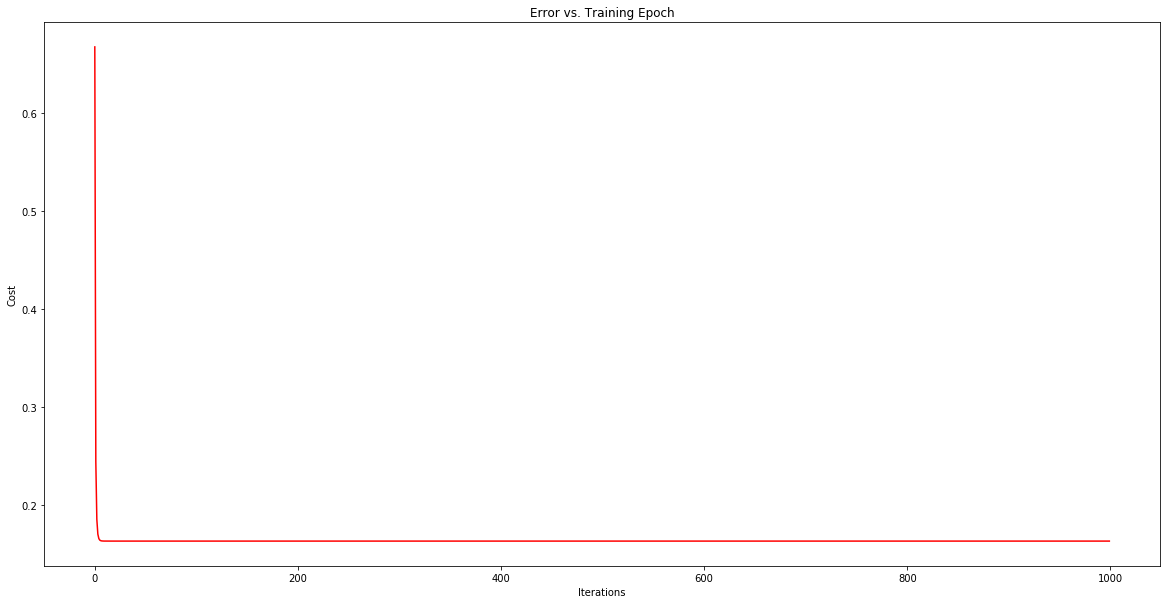

In [100]:
# Iteration vs Error(Cost) plot
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

### Apply Normal Equation

In [101]:
# Normal Equation
theta_norm = np.linalg.inv(X.T.dot(X) + reg_lambda).dot(X.T).dot(Y)
print("Co-efficient matrix after applying Normal Equation : ")
print(theta_norm.T)

finalCost_norm = computeCost(X,Y,theta_norm.T, reg_lambda)
print("Cost after applying Normal Equation : ",finalCost_norm)

Co-efficient matrix after applying Normal Equation : 
[[-0.00030681  0.28787829  0.05049532  0.26952103  0.21300643  0.08708037
   0.06450466  0.09725656  0.10021449  0.22014131  0.13678163  0.14863031]]
Cost after applying Normal Equation :  0.16313916095747125


In [102]:
print("Difference in Final Cost for Normal Equation and Gradient Descent(learning rate=",alpha,",iterations=",iters,") : ")
print(abs(finalCost_norm-finalCost))

Difference in Final Cost for Normal Equation and Gradient Descent(learning rate= 0.5 ,iterations= 1000 ) : 
3.0522892752182784e-07


### Change lambda and alpha for better tuning

After  1000  iterations and learning rate =  0.1  we get the following Co-efficient matrix : 
[[-2.27087376e-16  2.92275513e-01  4.73122194e-02  2.73106430e-01
   2.16787907e-01  8.64647601e-02  6.36225184e-02  9.96754211e-02
   1.02622633e-01  2.22461653e-01  1.37062834e-01  1.50078633e-01]]
Cost after training :  0.16317406975350043
Co-efficient matrix after applying Normal Equation : 
[[-0.02742474  0.28182615  0.0420969   0.26362252  0.19673465  0.07210537
   0.05308791  0.07844751  0.07195591  0.2053791   0.12465362  0.13490579]]
Cost after applying Normal Equation :  0.16560467500629283


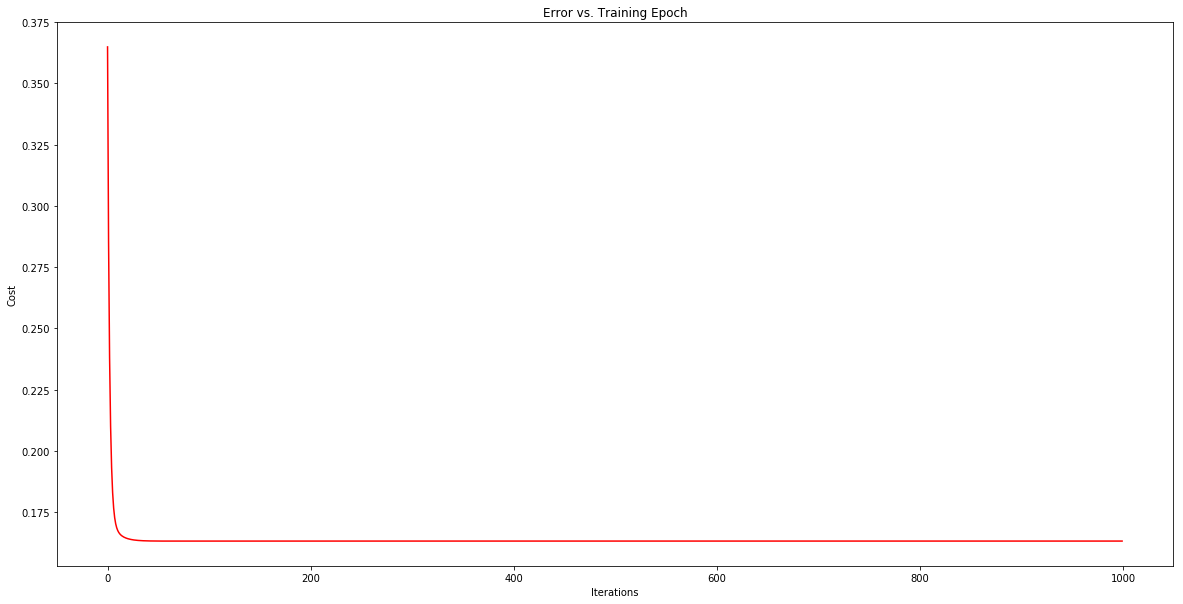

In [103]:
theta = np.zeros([1,X.shape[1]])
alpha = 0.1
iters = 1000
reg_lambda = 10

print('After ',iters,' iterations and learning rate = ',alpha,' we get the following Co-efficient matrix : ')
# Running the Gradient Descent Function
theta_final,cost = gradientDescent(X,Y,theta,iters,alpha,reg_lambda)
print(theta_final)
# Calculating cost after tuning of hyper Parameters
finalCost = computeCost(X,Y,theta_final, reg_lambda)
print('Cost after training : ',finalCost)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

theta_norm = np.linalg.inv(X.T.dot(X) + reg_lambda).dot(X.T).dot(Y)
print("Co-efficient matrix after applying Normal Equation : ")
print(theta_norm.T)

finalCost_norm = computeCost(X,Y,theta_norm.T, reg_lambda)
print("Cost after applying Normal Equation : ",finalCost_norm)

After  1000  iterations and learning rate =  0.1  we get the following Co-efficient matrix : 
[[-3.02891615e-16  2.87946770e-01  5.05903389e-02  2.69587768e-01
   2.13190537e-01  8.72497940e-02  6.46338322e-02  9.74693681e-02
   1.00534206e-01  2.20308333e-01  1.36918852e-01  1.48785594e-01]]
Cost after training :  0.16313885233554
Co-efficient matrix after applying Normal Equation : 
[[-3.07182266e-08  2.87946759e-01  5.05903325e-02  2.69587758e-01
   2.13190515e-01  8.72497778e-02  6.46338202e-02  9.74693447e-02
   1.00534172e-01  2.20308314e-01  1.36918838e-01  1.48785577e-01]]
Cost after applying Normal Equation :  0.1631388523355431


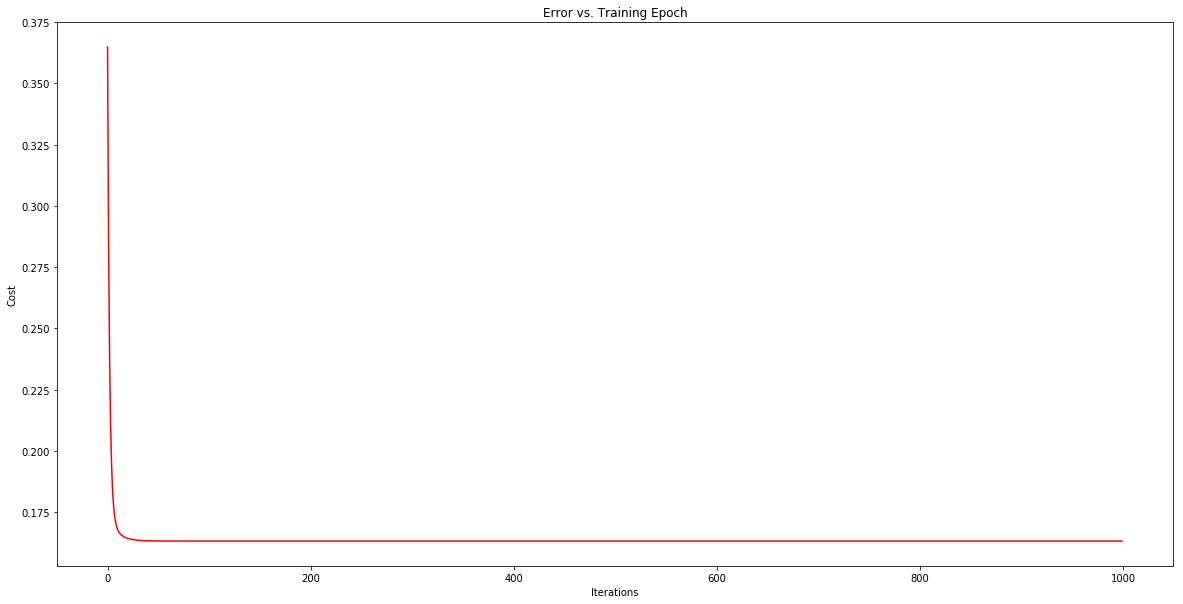

In [104]:
theta = np.zeros([1,X.shape[1]])
alpha = 0.1
iters = 1000
reg_lambda = 0.00001

print('After ',iters,' iterations and learning rate = ',alpha,' we get the following Co-efficient matrix : ')
# Running the Gradient Descent Function
theta_final,cost = gradientDescent(X,Y,theta,iters,alpha,reg_lambda)
print(theta_final)
# Calculating cost after tuning of hyper Parameters
finalCost = computeCost(X,Y,theta_final, reg_lambda)
print('Cost after training : ',finalCost)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

theta_norm = np.linalg.inv(X.T.dot(X) + reg_lambda).dot(X.T).dot(Y)
print("Co-efficient matrix after applying Normal Equation : ")
print(theta_norm.T)

finalCost_norm = computeCost(X,Y,theta_norm.T, reg_lambda)
print("Cost after applying Normal Equation : ",finalCost_norm)

### Now training on 70% of data

After  1000  iterations and learning rate =  0.1  we get the following Co-efficient matrix : 
[[0.10808562 0.30683741 0.05510587 0.23193297 0.19787262 0.07387831
  0.08532251 0.10694251 0.1111721  0.19122834 0.13672893 0.35849934]]
Cost after training :  0.16909407548278382
Co-efficient matrix after applying Normal Equation : 
[[0.10656492 0.30669401 0.05510817 0.23203484 0.19731334 0.07367699
  0.08504142 0.10653886 0.11067116 0.19116089 0.13660094 0.35638866]]
Cost after applying Normal Equation :  0.1690954267457682


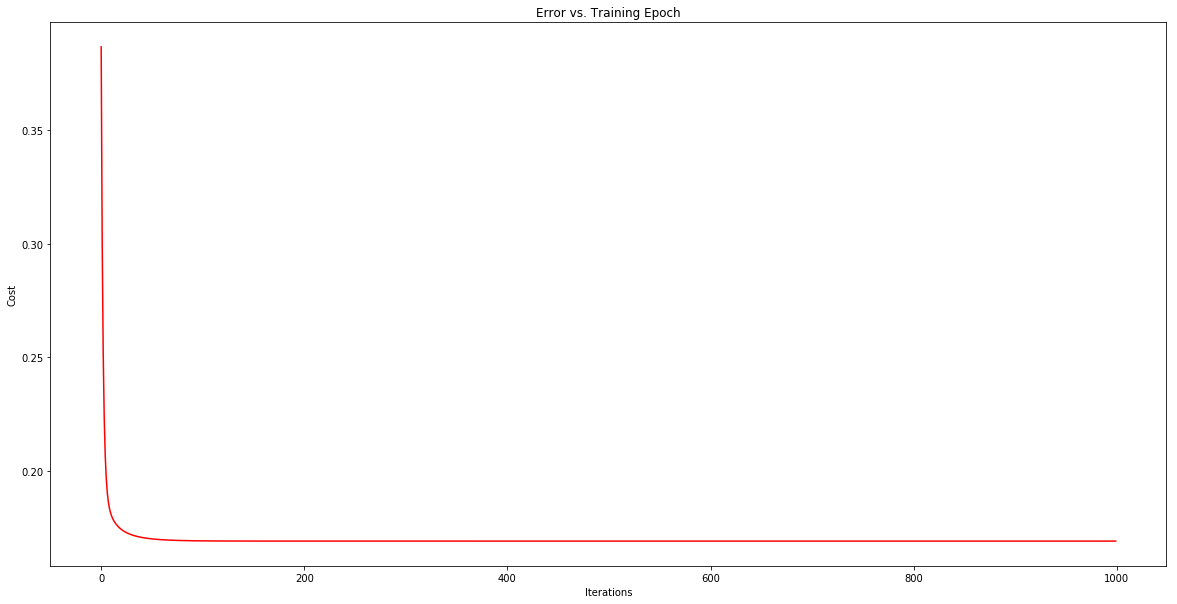

In [107]:
X_train=X[:round(.7*len(X))]
Y_train=Y[:round(.7*len(X))]
theta = np.zeros([1,X_train.shape[1]])
alpha = 0.1
iters = 1000
reg_lambda = 0.1

print('After ',iters,' iterations and learning rate = ',alpha,' we get the following Co-efficient matrix : ')
# Running the Gradient Descent Function
theta_final,cost = gradientDescent(X_train,Y_train,theta,iters,alpha,reg_lambda)
print(theta_final)
# Calculating cost after tuning of hyper Parameters
finalCost = computeCost(X_train,Y_train,theta_final, reg_lambda)
print('Cost after training : ',finalCost)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

theta_norm = np.linalg.inv(X_train.T.dot(X_train) + reg_lambda).dot(X_train.T).dot(Y_train)
print("Co-efficient matrix after applying Normal Equation : ")
print(theta_norm.T)

finalCost_norm = computeCost(X_train,Y_train,theta_norm.T, reg_lambda)
print("Cost after applying Normal Equation : ",finalCost_norm)

In [108]:
X_test=X[round(.7*len(X)):]
Y_test=Y[round(.7*len(X)):]
finalCost = computeCost(X_test,Y_test,theta_final, reg_lambda)
print('Cost after training with Gradient descent: ',finalCost)

finalCost_norm = computeCost(X_test,Y_test,theta_norm.T, reg_lambda)
print("Cost after applying Normal Equation : ",finalCost_norm)

Cost after training with Gradient descent:  0.24850868246565566
Cost after applying Normal Equation :  0.24635836733674232
